In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
# %matplotlib widget
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')


In [8]:
# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)

In [14]:
# !pip install lab_utils_softmax

ERROR: Could not find a version that satisfies the requirement lab_utils_softmax (from versions: none)
ERROR: No matching distribution found for lab_utils_softmax

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
# from public_tests import * 

from autils import *
# from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [79]:
import keras
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [80]:
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')


x_train shape:(60000, 28, 28)
x_test shape:(10000, 28, 28)
y_train shape:(60000,)
y_test shape:(10000,)


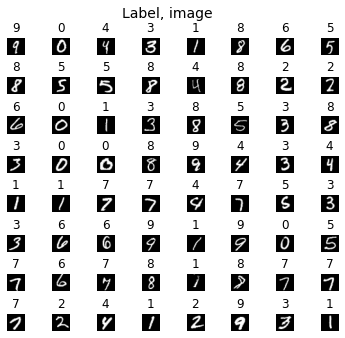

In [81]:
fig,axes = plt.subplots(8,8,figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91])
m=x_train.shape[0]
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    ax.imshow(x_train[random_index],cmap='gray')
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle('Label, image',fontsize=14)

In [82]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(28*28,)),
    Dense(25,activation='relu',name='L1'),
    Dense(15,activation='relu',name='L2'),
    Dense(10,activation='linear',name='L3'),
],name='my_model')

In [83]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
[layer1, layer2, layer3] = model.layers

In [85]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [86]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


In [87]:
x_train = x_train.reshape(60000,28*28)

x_test = x_test.reshape(10000,28*28)


In [88]:
history = model.fit(x_train,y_train,epochs=80)

Epoch 1/80
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9787
Epoch 2/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9890
Epoch 3/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6941
Epoch 4/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4573
Epoch 5/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3399
Epoch 6/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2880
Epoch 7/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551
Epoch 8/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2281
Epoch 9/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2122
Epoch 10/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1983
Epoch 11/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1868
Epoch 12/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1800
E

In [90]:
y_train[1001]

7

In [91]:
img_seven = x_train[1001]
prediction = model.predict(img_seven.reshape(1,28*28))
print(f'actual value: {y_train[1001]}')
print(f'predict value: {prediction} ')

1/1 [==============================] - 0s 77ms/step
actual value: 7
predict value: [[ 85.85  97.43  84.81  98.69  86.84  93.73  27.83 108.89  73.65  93.8 ]] 


In [92]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Seven. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Seven. Probability vector: 
[[9.89e-11 1.06e-05 3.50e-11 3.70e-05 2.66e-10 2.61e-07 6.24e-36 1.00e+00
  4.97e-16 2.80e-07]]
Total of predictions: 1.000


In [93]:
yhat = np.argmax(prediction_p)
print(f'np.argmax:{yhat}')

np.argmax:7


1/1 [==============================] - 0s 22ms/step


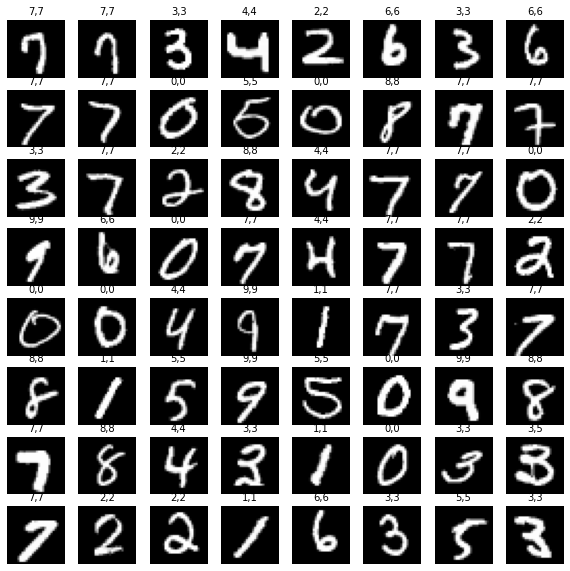

In [94]:
m = x_train.shape[0]
fig,axes = plt.subplots(8,8,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    ax.imshow(x_train[random_index].reshape((28,28)),cmap='gray')
    prediction = model.predict(x_train[random_index].reshape(1,28*28))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f'{y_train[random_index]},{yhat}',fontsize=10)
    ax.set_axis_off()

In [102]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(25, activation='relu', input_shape=(28 * 28,), name='L1'),
    Dense(15, activation='relu', name='L2'),
    Dense(10, activation='linear', name='L3'),
])

# Compile the model with accuracy as a metric
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=80, verbose=1)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = score[1]

print(f'Accuracy: {accuracy:.2f}')


Epoch 1/80
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4188 - accuracy: 0.8798
Epoch 2/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2104 - accuracy: 0.9397
Epoch 3/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9518
Epoch 4/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9582
Epoch 5/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9627
Epoch 6/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9652
Epoch 7/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1049 - accuracy: 0.9681
Epoch 8/80
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0969 - accuracy: 0.9707
Epoch 9/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9725
Epoch 10/80
1875/1875 [==============================] - 4s 2ms/step - loss: 0.086

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to include the channel dimension
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=12, validation_data=(x_test, y_test))

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = score[1]

print(f'Accuracy: {accuracy:.2f}')


Epoch 1/12
469/469 [==============================] - 31s 64ms/step - loss: 0.5414 - accuracy: 0.8276 - val_loss: 0.0601 - val_accuracy: 0.9811
Epoch 2/12
469/469 [==============================] - 31s 65ms/step - loss: 0.2114 - accuracy: 0.9373 - val_loss: 0.0388 - val_accuracy: 0.9871
Epoch 3/12
469/469 [==============================] - 32s 69ms/step - loss: 0.1602 - accuracy: 0.9523 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 4/12
469/469 [==============================] - 33s 70ms/step - loss: 0.1349 - accuracy: 0.9603 - val_loss: 0.0243 - val_accuracy: 0.9908
Epoch 5/12
469/469 [==============================] - 33s 70ms/step - loss: 0.1172 - accuracy: 0.9652 - val_loss: 0.0255 - val_accuracy: 0.9905
Epoch 6/12
469/469 [==============================] - 34s 71ms/step - loss: 0.1032 - accuracy: 0.9693 - val_loss: 0.0212 - val_accuracy: 0.9928
Epoch 7/12
469/469 [==============================] - 34s 72ms/step - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.0220 - val_accuracy:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = score[1]

print(f'Accuracy: {accuracy:.2f}')
